# Лабораторная работа "Цифровой осциллограф"
Радиофизическая лаборатория, ФРКТ МФТИ

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    #plt.show()

    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
    
    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
    #plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
    #plt.show()

# 3 вариант

# Задание 1.1. Спектр отрезка синусоиды.

## 1) 

$ f_0 = 60 \text{ kHz} $, $ f_s = 1 \text{ MHz} $

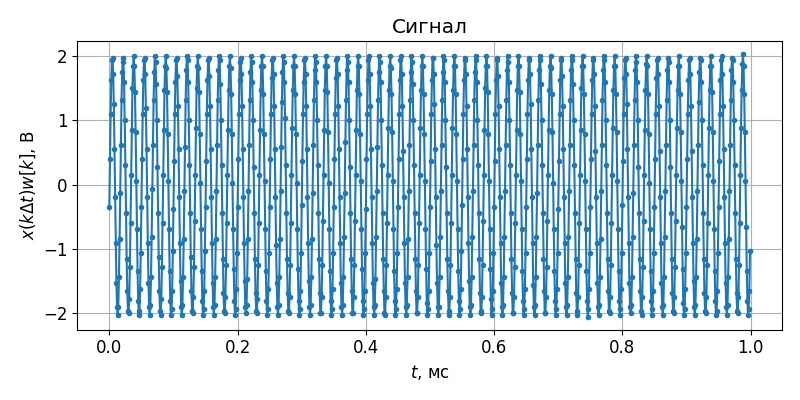

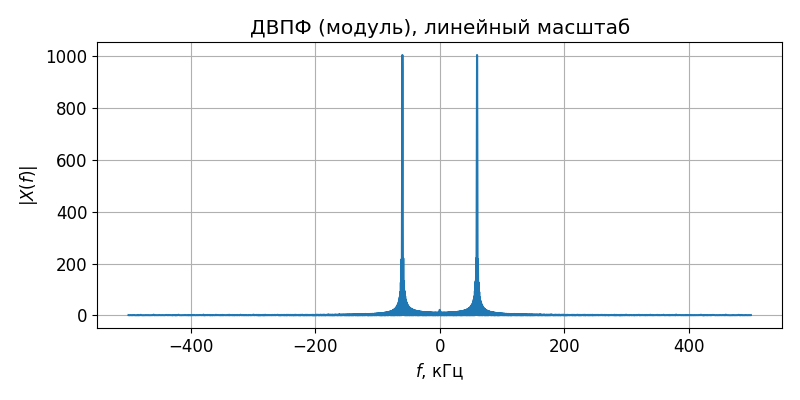

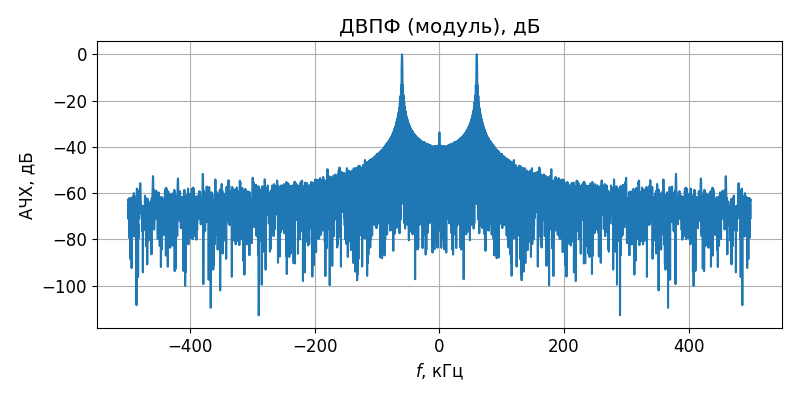

In [3]:
analyse(file='1lab/1.1/1)/boxcar.txt', const_level=0, window='boxcar')

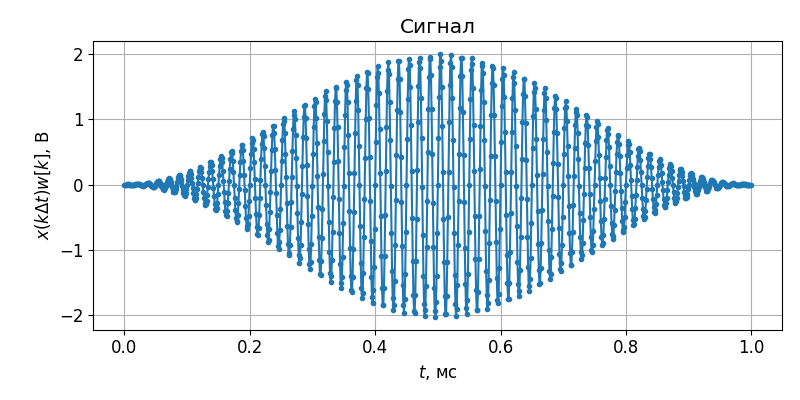

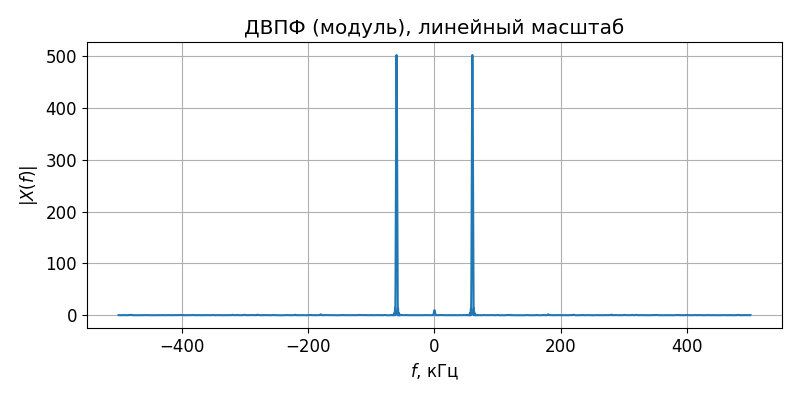

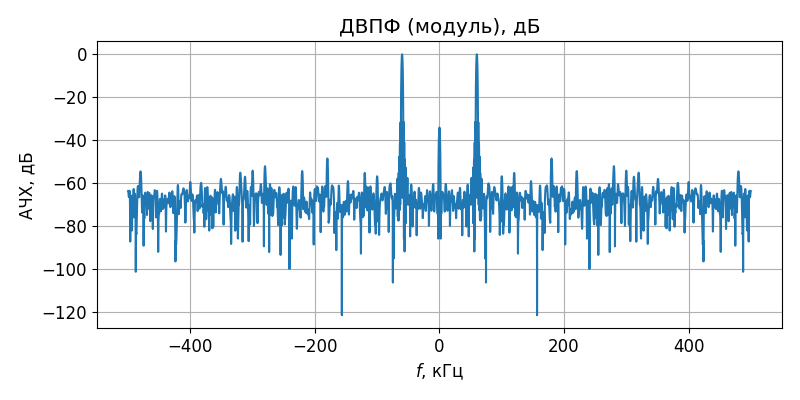

In [4]:
analyse(file='1lab/1.1/1)/hann.txt', const_level=0, window='hann')

### Сравнить
### а) частоты максимумов в спектре с частотой синусоиды. 

* Прямоугольное окно: $ -60 \text{ kHz} $, $ 60 \text{ kHz} $
   
* Окно Ханна: $ -60 \text{ kHz} $, $ 60 \text{ kHz} $
   
* $f_0$: $ 60 \text{ kHz} $
   
### б) ширину главного лепестка спектра на нулевом уровне с табличным значением для окна

* Прямоугольное окно: $ \Delta \nu = \frac{2}{N} $, $ \Delta \nu = \frac{\Delta f}{f_s} $
   + теория: $ 2 \text{ kHz} $
   + практика: $ 2 \text{ kHz} $
* Окно Ханна: $ \Delta \nu = \frac{4}{N} $, $ \Delta \nu = \frac{\Delta f}{f_s} $
   + теория: $ 4 \text{ kHz} $
   + практика: $ 4 \text{ kHz} $
   
### в) ширину главного лепестка спектра на уровнях -3 дБ и -6 дБ от максимального в бинах ДПФ с табличным значением для окна

* Прямоугольное окно:
  + $ -3 \text{ дБ} $:
    + теория: $ \Delta \nu = \frac{0.89}{N} \Rightarrow \Delta f = 890 \text{ Hz} $ 
    + практика: $ 879 \text{ Hz} $
  + $ -6 \text{ дБ} $:
    + теория: 
    + практика: $ 1199 \text{ Hz} $
* Окно Ханна:
  + $ -3 \text{ дБ} $:
    + теория: $ \Delta \nu = \frac{1.44}{N} \Rightarrow \Delta f = 1440 \text{ Hz} $ 
    + практика: $ 1438 \text{ Hz} $
  + $ -6 \text{ дБ} $:
    + теория: 
    + практика: $ 2005 \text{ Hz} $

### г) уровень максимального бокового лепестка спектра относительно главного с табличным значением для окна

* Прямоугольное окно:
  + теория: $ -13,3 \text{ дБ} $
  + практика: $ -13,3 \text{ дБ} $
* Окно Ханна:
  + теория: $ -31,5 \text{ дБ} $
  + практика: $ -31,5 \text{ дБ} $
   
### д) относительный уровень шумов квантования в дБ с теоретическим значением для 8-разрядного АЦП

* Прямоугольное окно:
  + теория: $ -50 \text{ дБ} $
  + практика: $ ? \text{ дБ} $
* Окно Ханна:
  + теория: $ -50 \text{ дБ} $
  + практика: $ -? \text{ дБ} $

## 2) 

$ f_1 = 750 \text{ kHz} $, $ f_s = 1 \text{ MHz} $

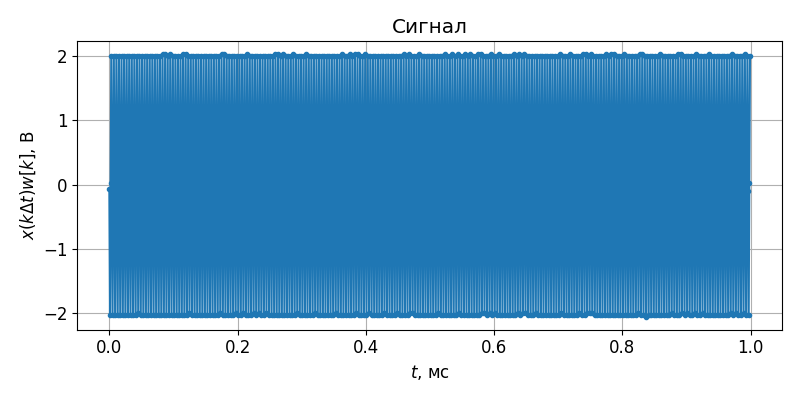

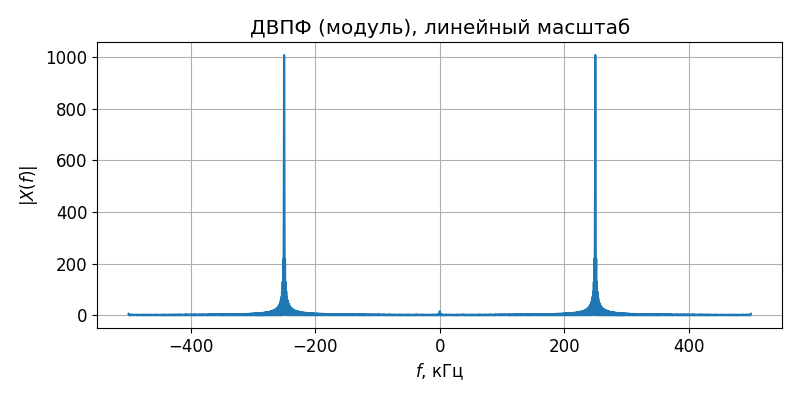

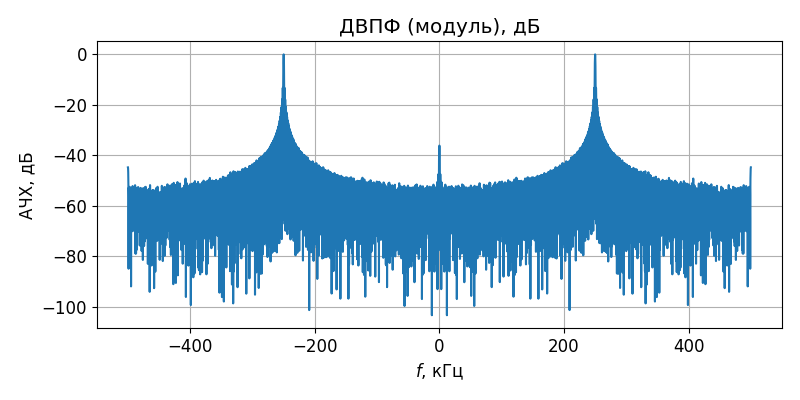

In [5]:
analyse(file='1lab/1.1/2)/boxcar.txt', const_level=0, window='boxcar')

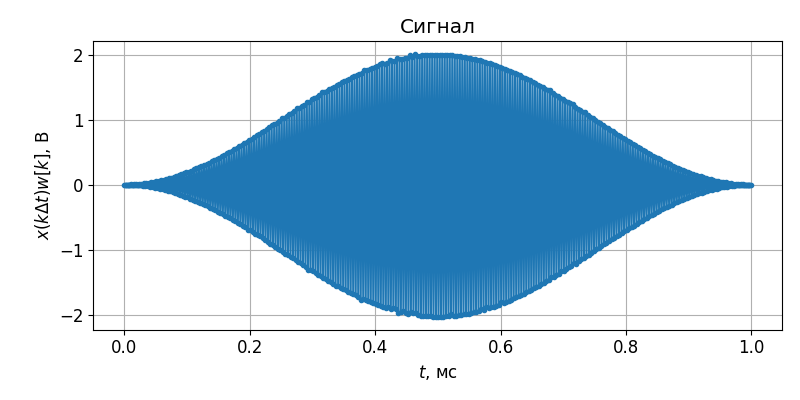

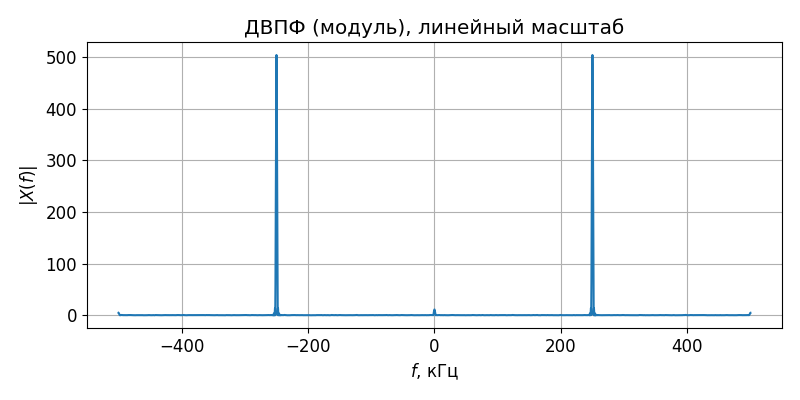

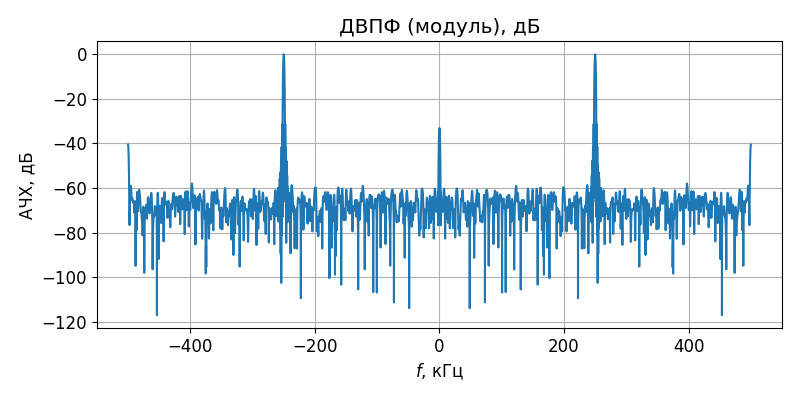

In [15]:
analyse(file='1lab/1.1/2)/hann.txt', const_level=0, window='hann')

# Задание 1.2. Спектр последовательности прямоугольных импульсов.

## 1) 

$ \tau = 2.5 \text{ } \mu \text{s} $, $ f_s = 20 \text{ MHz} $

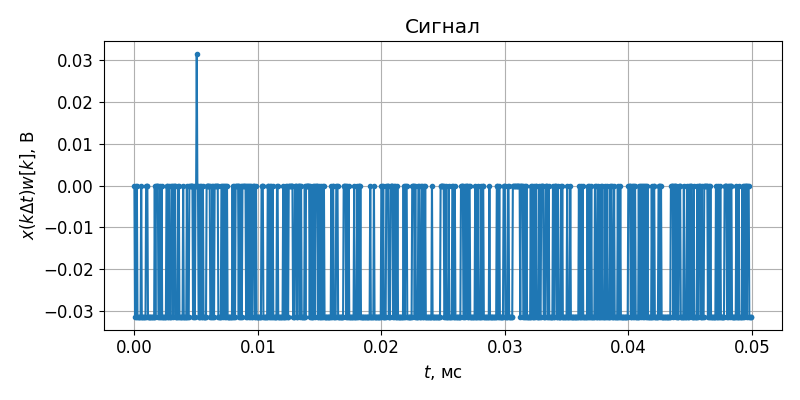

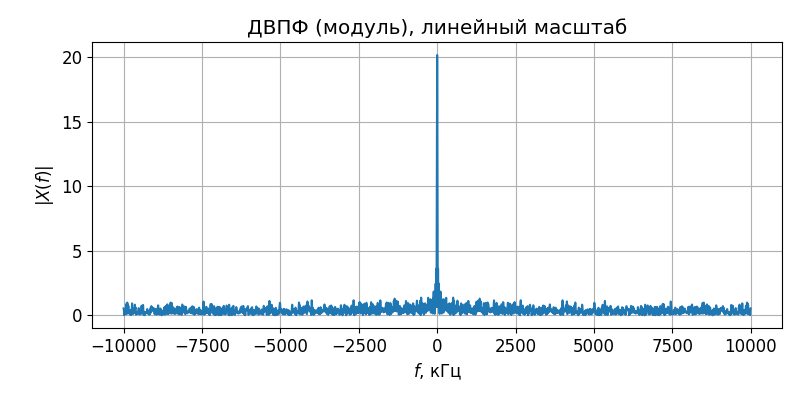

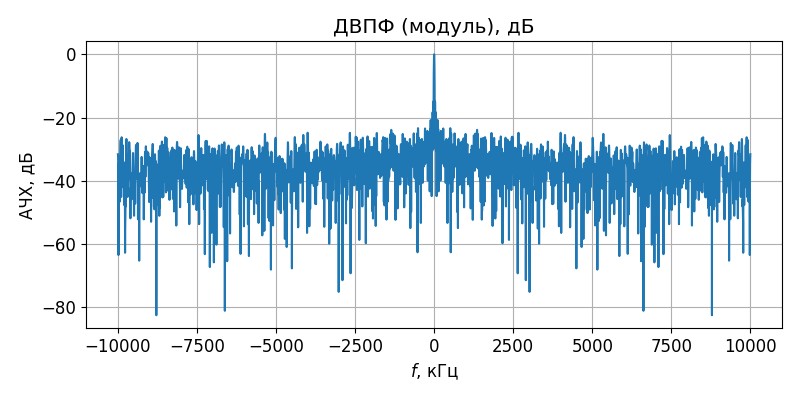

In [16]:
analyse(file='1lab/1.2/1)/boxcar.txt', const_level=0, window='boxcar')

## 2) 

$ \tau = 7.5 \text{ } \mu \text{s} $, $ f_s = 20 \text{ MHz} $

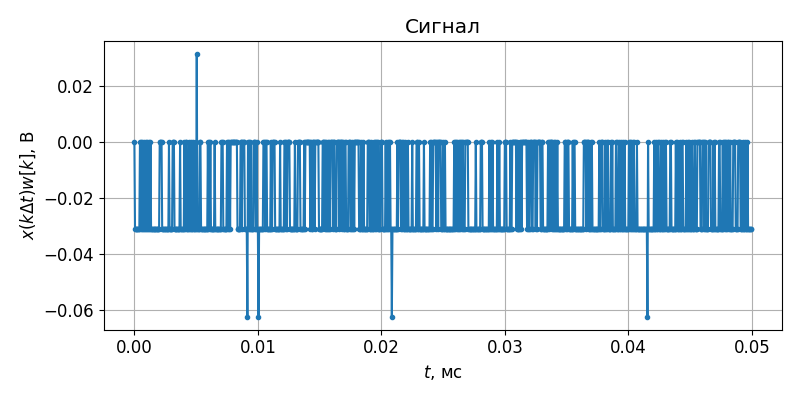

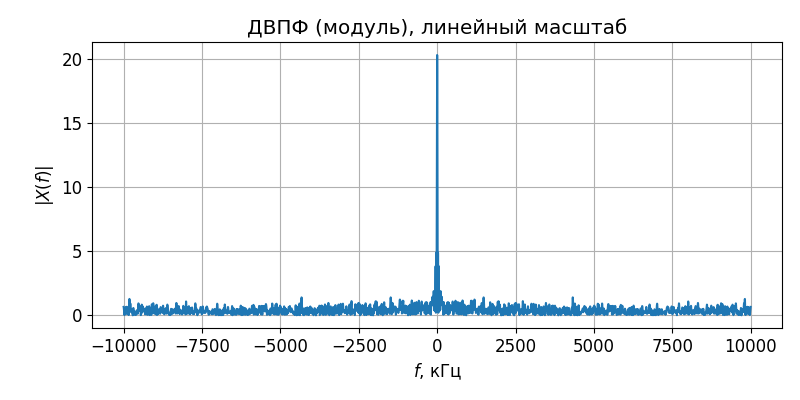

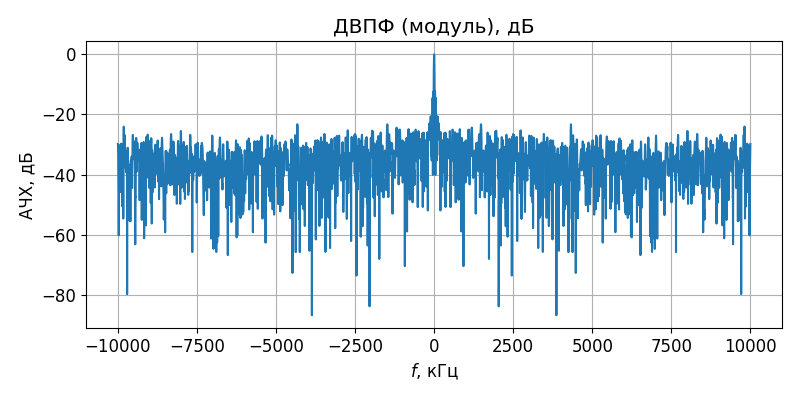

In [18]:
analyse(file='1lab/1.2/2)/boxcar.txt', const_level=0, window='boxcar')